Practice 8

In [46]:
import YData 



#### Download Practice 8 Jupyter Notebook ####  
#YData.download_practice_code(8)               # Without Answers. 
#YData.download_practice_code(8, True)         # With Answers (won't work until Friday eve).






#### Download Data #### 
YData.download_data("tesla.jpg")
YData.download_data("electric.csv")
YData.download_data("data_science_salaries.csv")
YData.download_data("woodard.csv")





#### Import Packages ####
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline





# ***Hypothesis Tests***

In hypothesis testing, we start with a claim about a population parameter (e.g., µ = 4.2, or π = 0.25).

This claim implies we should get a certain distribution for the (test) statistic, called "The null distribution". 

If our observed statistic is highly unlikely to come from the null distribution, we reject the claim. 

We can break down the process of running a hypothesis test into 5 steps. 

1. State the Null and Alternative Hypothesis.
2. Calculate the Observed Statistic of interest.
3. Create the Null Distribution.
4. Calculate the p-value.
5. Make a decision.




# A. Hypothesis Tests for Single Proportion

Suppose that it is of interest to find if more than 25% of all the elctric/hybrid cars on the US roads are manufactured by Telsa.  
- Use our 5 steps of hypothesis testing to assess whether the proportion of Telsa is greater than 25%.
- To test this Hypothesis, we have a random sample of $205,439$ electric/hybrid cars in the US.
- ***Note that our sample size $n = 205,439$.***


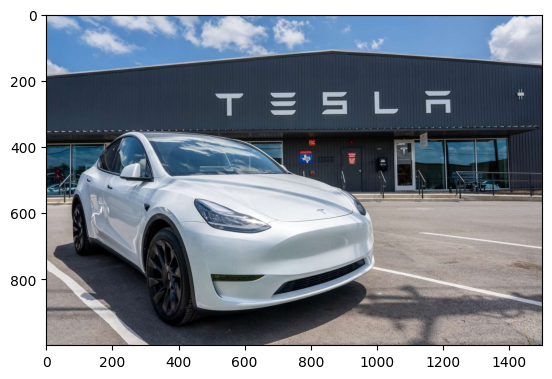

In [47]:
tesla = plt.imread("tesla.jpg");
plt.imshow(tesla);

In [48]:
# Read the Data as Pandas DataFrame. 

elec_cars = pd.read_csv("electric.csv")


elec_cars.head()

,Make,Model
0,TOYOTA,RAV4 PRIME
1,NISSAN,LEAF
2,TESLA,MODEL 3
3,NISSAN,LEAF
4,CHEVROLET,BOLT EV


### **Step 1: State the null and alternative hypotheses**

**In words** 

Null hypothesis: 25% of electric/hybrid cars are Telsa make.

Alternative hypothesis: More than 25% of electric/hybrid cars are Telsa make.


**In symbols**

$H_0$: $ \pi = 0.25$

$H_A$: $ \pi > 0.25$



### **Step 2: Calculate the observed statistic**

Calculate the observed statistic and save it to the name `obs_stat`. 

What symbol should we use to denote this observed statistic? 
- Answer: $ \hat{p}$



In [49]:
# Proportion of Telsa in the sample. 

obs_stat = np.mean(elec_cars["Make"] == "TESLA")
obs_stat


np.float64(0.4396341493095274)

### **Step 3: Create the null distribution**

To create the null distribution let's use the code we wrote to simulate the proportion of heads we get from flipping a coin *n* times. 

As we discusswed in practice 7, the code `flip_coins(n, prob)` simulates flipping a coin `n` times with a probability of getting heads given by the argument `prob` and returns the proportion of heads observed (make sure you understand how this code works! We did this problem in practice 7). 

So, the function `flip_coins(n, prob)` generates `n` random numbers (between 0 and 1) and returns the proportion of numbers that are less than `prob`.



- Create a function flip_coins(n, prob) that generates n random numbers (between 0 and 1) and returns the proportion of numbers that are less than prob.

In [50]:
# Function "flip_coins(n, prob)" from Practice 7. 

def flip_coins(n, prob):
    rand_nums = np.random.rand(n)
    prop_heads = np.mean(rand_nums <= prob)
    return prop_heads


- Use the above function to simulate one statistic $\hat{p}$ that is consistent with the null hypothesis.

In [51]:
# Use the above function once here. 

flip_coins(205439, 0.25)

np.float64(0.2496118069110539)

- Now generate a null distribution, by using a for loop to create 10,000 statistics consistent with the null hypothesis. Store this null distribution in an object called `null_dist`. 

In [52]:
# Create the null distribution.

null_dist = []

for i in range(10000):
    curr_null_stat = flip_coins(205439, 0.25)
    null_dist.append(curr_null_stat)




- Let's also visualize the null distribution as a histogram. Set the `bins` argument appropriately to create bins in this histogram. Does the observed statistic you calculated in step 2 seem to have come from this null distribution? 

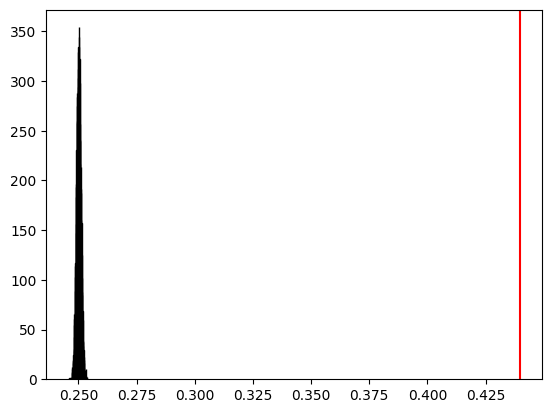

In [53]:
# visualize the null distribution. 

plt.hist(null_dist, edgecolor = "black", bins = 100);

# add a red vertical line at the value of the observed statistic

plt.axvline(obs_stat, color = "r");


### **Step 4: Calculate the p-value**

The p-value is the proportion of points in the null distribution that are more extreme than the observed statistic. (In other words, the p-value is the probability, that we get a statistic as or more extreme than the
observed statistic from the null distribution.)


In [54]:
p_value = np.mean(np.array(null_dist) >= obs_stat)
p_value

np.float64(0.0)

### **Step 5: Draw a conclusion**

Is there convincing evidence to reject the null hypothesis? 

Answer: Yes, we have sufficient statistical evidence to be able to reject the null hypothesis and hence conclude that more than 25% of the electric/hybrid cars on the US roads are Tesla make.


<br>
<br>
<br>
<br>

# B. Hypothesis test for two means.

- Let us return to data science salaries that we analyzed earlier in the semester.
- In particular, we are interested in testing if the data scientists who work On-site tend to earn more (on average) than the data scientists who Do Not work On-site.
- Use our 5 steps of hypothesis testing to test the above Hypothesis. 





In [55]:
salaries = pd.read_csv("data_science_salaries.csv")

In [56]:
salaries.head(5)

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


### **Step 1: State the null and alternative hypotheses**

Use symbols $\mu_{On}$ and $\mu_{Off}$, where $\mu_{On}$ and $\mu_{Off}$ are the population means of On-site data science salaries and *Not* On-site data salaries respectively. 


**In words** 

Null hypothesis: ....

Alternative hypothesis: ....


**In symbols**

$H_0$: $ \mu_{On} - \mu_{Off} = 0$

$H_A$: $ \mu_{On} - \mu_{Off} > 0$



### **Step 2: Calculate the observed statistic**

Calculate the observed statistic and save it to the name `obs_stat`. 

What symbol should we use to denote this observed statistic? 
- Answer: $ \bar{x}_{On} - \bar{x}_{Off}$



In [57]:
# DataFrame of interest. 

salaries2 = salaries[["work_models", "salary_in_usd"]]
salaries2.head(5)

,work_models,salary_in_usd
0,Remote,148100
1,Remote,98700
2,Remote,140032
3,Remote,100022
4,On-site,120000


In [58]:
# Compute obs_stat.

on_site_mean = np.mean(salaries2["salary_in_usd"][salaries2["work_models"] == "On-site"])
off_site_mean = np.mean(salaries2["salary_in_usd"][~(salaries2["work_models"] == "On-site")])
obs_stat = on_site_mean - off_site_mean 
obs_stat




np.float64(16674.06328192234)

To make the rest of the analysis easier, write a function `x_bars_diff(salaries2_df)` that will take a DataFrame `salaries2_df` and will return the difference in the means of On-site salaries and Not On-site salaries. 

Also, test the function to make sure it give the same observed statistic you calculated above.

In [59]:
# Write your function here. 

def x_bars_diff(salaries2_df):
    on_site_mean = np.mean(salaries2_df["salary_in_usd"][salaries2_df["work_models"] == "On-site"])
    off_site_mean = np.mean(salaries2_df["salary_in_usd"][~(salaries2_df["work_models"] == "On-site")])
    obs_stat = on_site_mean - off_site_mean
    return obs_stat


# get that the function works

x_bars_diff(salaries2)


np.float64(16674.06328192234)

### **Step 3: Create the null distribution** 

Now let's create a null distribution that has 10,000 statistics that are consistent with the null hypothesis. 

In this example, if the null hypothesis was true, then there would be no difference between the On-site data science salaries and Not On-site data science salaries. Thus, under the null hypothesis, we can shuffle the group labels and get equally valid statistics. 

Let's create one statistic consistent with the null distribution to understand the process. We can then repeat this 10,000 times to get a full null distribution. 

In [60]:
# shuffle the data once to create one statistic consistent with the Null. 

shuff_data = salaries2.copy()
shuff_data['work_models'] = np.random.permutation(shuff_data["work_models"])
x_bars_diff(shuff_data)




np.float64(-2287.1797227492207)

In [61]:
%%time

# create a full null distribution 


null_dist = []

for i in range(10000):
    shuff_data['work_models'] = np.random.permutation(shuff_data["work_models"])
    shuff_stat = x_bars_diff(shuff_data)
    null_dist.append(shuff_stat)



CPU times: user 11.1 s, sys: 2 ms, total: 11.1 s
Wall time: 11.2 s


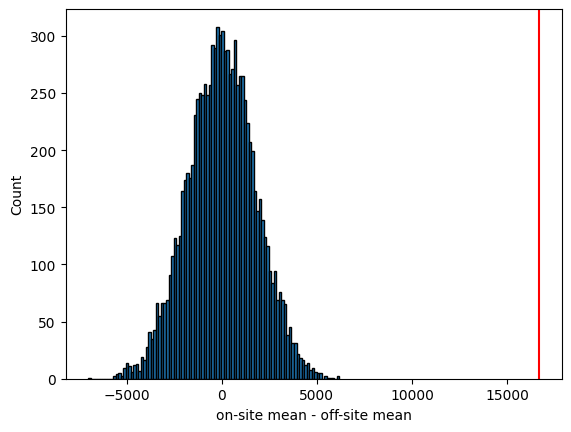

In [62]:
# visualize the null distribution 

plt.hist(null_dist, edgecolor = "black", bins = 100);


# put a red line at the observed statistic value

plt.axvline(obs_stat, color = "red");
plt.xlabel("on-site mean - off-site mean");
plt.ylabel("Count");


### **Step 4: Calculate the p-value**

The p-value is the proportion of points in the null distribution that are more extreme than the observed statistic. 


In [63]:
p_value = np.mean(np.array(null_dist) >= obs_stat)
p_value

np.float64(0.0)

### **Step 5: Draw a conclusion**

Is there convincing evidence to reject the null hypothesis? 

Answer: Since the p-value is less than the typical significance level of 0.05, we can reject the null hypothesis. This we conclude there average On-site data science salaries are significantly higher than the Not On-site data science salaries.





<br>
<br>
<br>
<br>

## ***Correlation Hypothesis Testing via Simulations Intuition Building Example***

In [64]:
# Set the number of samples you want
n_samples = 1000

# Generate two independent random variables X and Y
X = np.random.normal(0, 1, n_samples)  # X ~ N(0, 1)
Y = np.random.normal(0, 1, n_samples)  # Y ~ N(0, 1)

# Check the correlation between X and Y
original_correlation = np.corrcoef(X, Y)[0, 1]
print(f"Original correlation between X and Y: {original_correlation}")

# Now permute Y randomly
Y_permuted = np.random.permutation(Y)

# Check the correlation between X and permuted Y
permuted_correlation = np.corrcoef(X, Y_permuted)[0, 1]
print(f"Correlation between X and permuted Y: {permuted_correlation}")

Original correlation between X and Y: 0.022745044883600716
Correlation between X and permuted Y: 0.013855321310571971


# ***Take Home Problem***: Hypothesis tests for correlation 

Let's run a hypothesis tests for correlation to see if size of a property (in Acres) and its total price are positively correlated. 


In [65]:
prop_prices = pd.read_csv("woodard.csv")

In [66]:
# Remove outlier. 

prop_prices = prop_prices[(prop_prices["Total $"] < 4000000)]
prop_prices.head()

,ID #,Year Built,Sq. Ft.,Story,Acres,No. Baths,Fireplaces,Total $,Land $,Building $,Zip
0,1,1990,2102,1.0,0.77,NaN,1,203200,44000,159200,27603
1,2,1986,1740,1.5,0.06,3.0,1,119096,22000,97096,27604
2,3,1955,795,1.0,0.30,1.0,0,71666,28000,43666,27610
3,4,1983,1152,1.0,0.68,2.0,0,131103,50000,81103,27616
5,6,1967,1752,1.0,0.29,1.5,1,144452,52000,92452,27604


### **Step 1: State the null and alternative hypotheses**

**In words** 

Null hypthesis: There is no correlation between the size (in Acres) of a property and its total price.

Alternative hypothesis: Properties that have larger sizes (in Acres) tend to cost more.

 

**In symbols**

$H_0$: $ \rho = 0 $

$H_A$: $ \rho > 0 $


### **Step 2: Calculate the observed statistic**

Let's calculate the observed correlation ($r$) between the property size (`Acres`) and its total price (`Total $`). 



In [67]:
import statistics

obs_stat = statistics.correlation(prop_prices["Acres"], prop_prices["Total $"])
obs_stat



0.20253290108099478

### **Step 3: Create the null distribution** 

How can we create one statistic consistent with the null hypothesis? 

See if you can create one statistic consistent with the null distribution below. Once you have done that, create the full null distribution!



In [68]:
# Create one statistic consistent with the null distribution

statistics.correlation(prop_prices["Acres"], np.random.permutation(prop_prices["Total $"]))



np.float64(-0.06533501066180258)

In [69]:
%%time

# Create the full null distribution

null_dist = []

for i in range(10000):  
        
    shuff_stat = statistics.correlation(prop_prices["Acres"],
                                        np.random.permutation(prop_prices["Total $"]))
    
    null_dist.append(shuff_stat)



CPU times: user 1.27 s, sys: 0 ns, total: 1.27 s
Wall time: 1.28 s


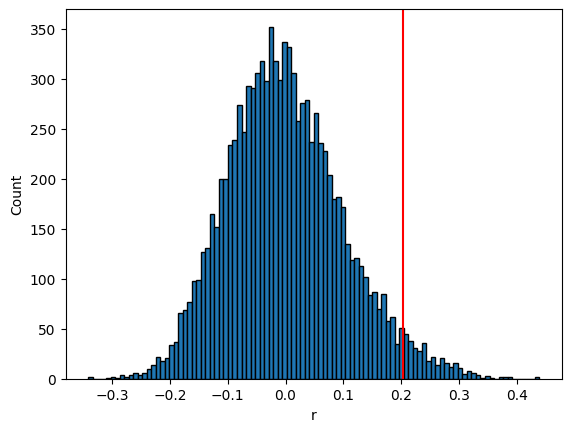

In [70]:
# visualize the null distribution 

plt.hist(null_dist, edgecolor = "black", bins = 100);


# put a red line at the observed statistic value

plt.axvline(obs_stat, color = "red");
plt.xlabel("r");
plt.ylabel("Count");


### **Step 4: Calculate the p-value**


In [71]:
p_value = np.mean(np.array(null_dist) >= obs_stat)

p_value

np.float64(0.0359)

### **Step 5: Draw a conclusion**

Is there convincing evidence to reject the null hypothesis? 

Answer: The p-value is small (less than the conventional level of 0.05) so we would reject the null hypothesis and conclude that (based on the sample) there seems to some positive correlation between the size of a property (in Acres) and its price.

